In [2]:
BiocManager::install(c("car"))

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.18), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'car'”
Old packages: 'dbplyr'



In [70]:
library(ggplot2)
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
data <- read.csv("data/prep.csv")

In [5]:
summary(data$arr_flights)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    59.0   120.0   381.7   273.0 21977.0 

In [10]:
summary(data[data$top30 == 1,]$arr_flights)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   123.0   331.0   991.2   877.0 21977.0 

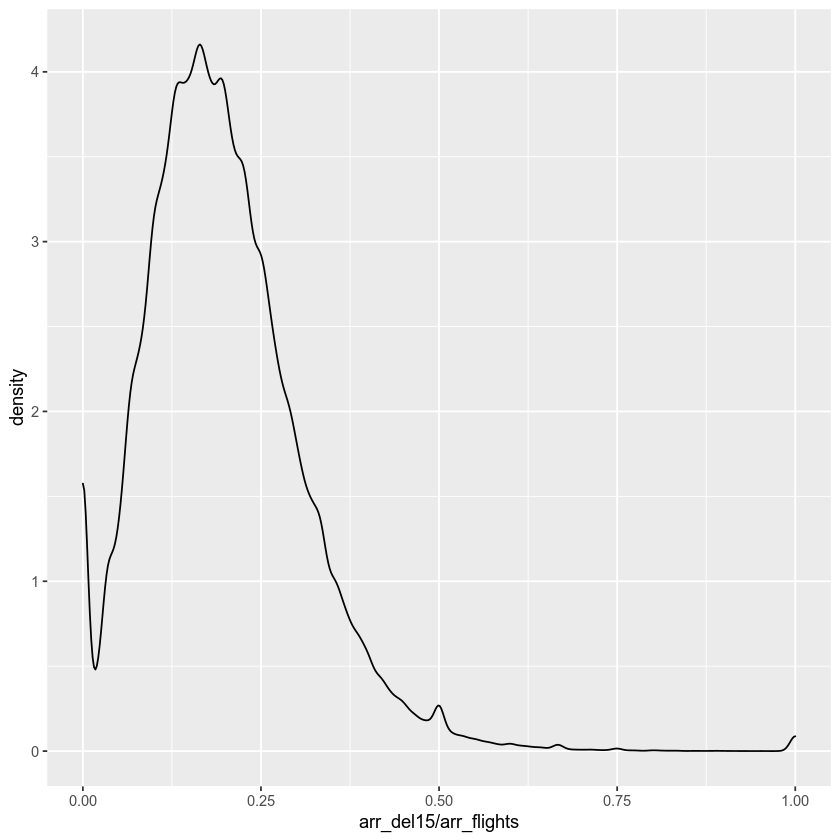

In [24]:
ggplot(data, aes(x=arr_del15/arr_flights)) + geom_density()

In [25]:
summary(data$arr_del15/data$arr_flights)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1224  0.1848  0.1976  0.2581  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1155  0.1696  0.1762  0.2296  0.6931 

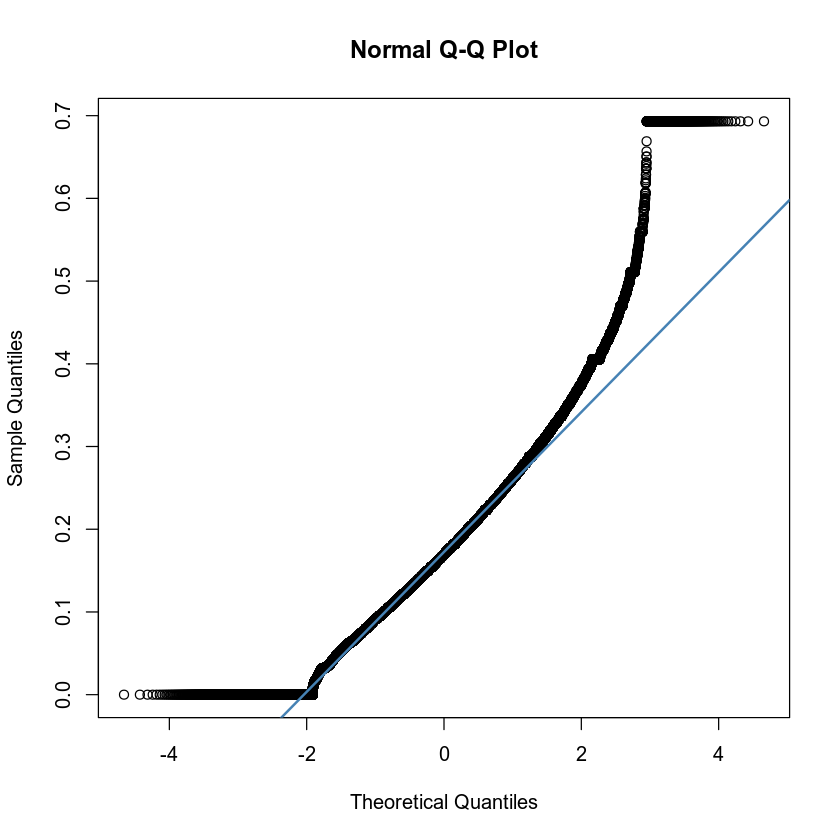

In [32]:
y <- log(1+data$arr_del15/data$arr_flights)
summary(y)
qqnorm(y); qqline(y,col = "steelblue", lwd = 2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1224  0.1848  0.1976  0.2581  1.0000 

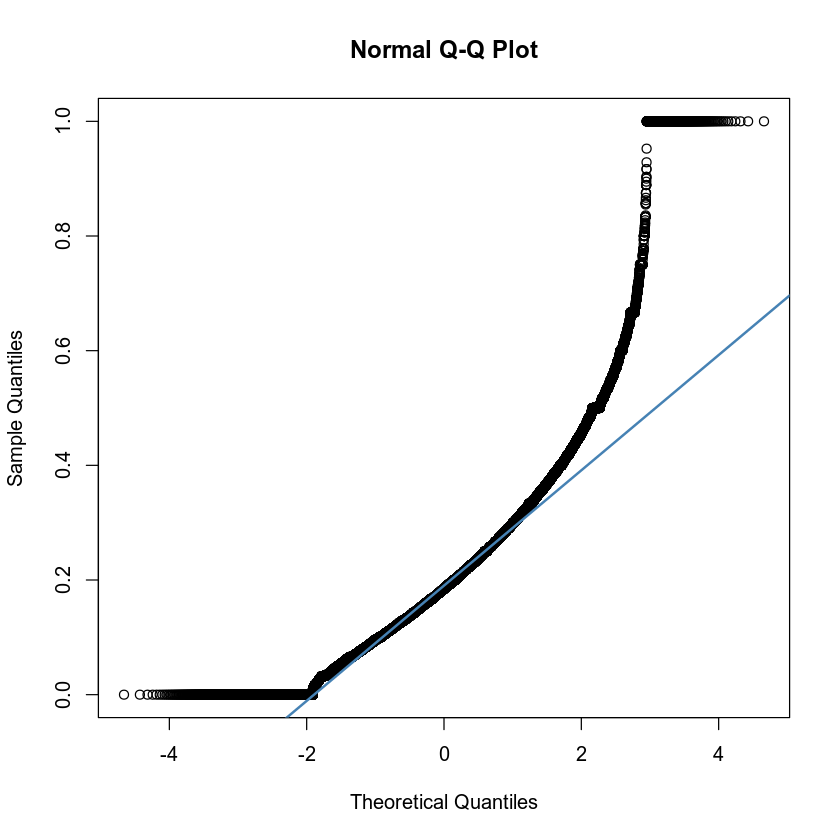

In [33]:
y <- data$arr_del15/data$arr_flights
summary(y)
qqnorm(y); qqline(y,col = "steelblue", lwd = 2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09531 4.07923 4.78833 4.84713 5.60984 9.99776 

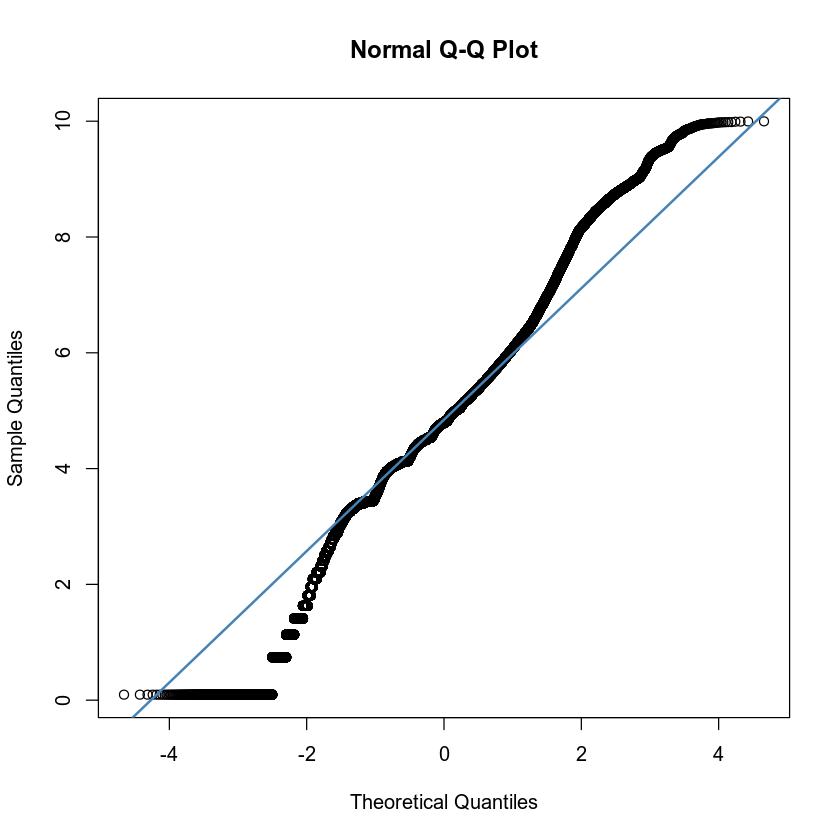

In [50]:
y <- log(.1+data$arr_flights)
summary(y)
qqnorm(y); qqline(y,col = "steelblue", lwd = 2)

In [47]:
op = data[data["top30"] > .5,]

In [48]:
summary(op$arr_flights)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   123.0   331.0   991.2   877.0 21977.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.812   5.802   5.798   6.777   9.998 

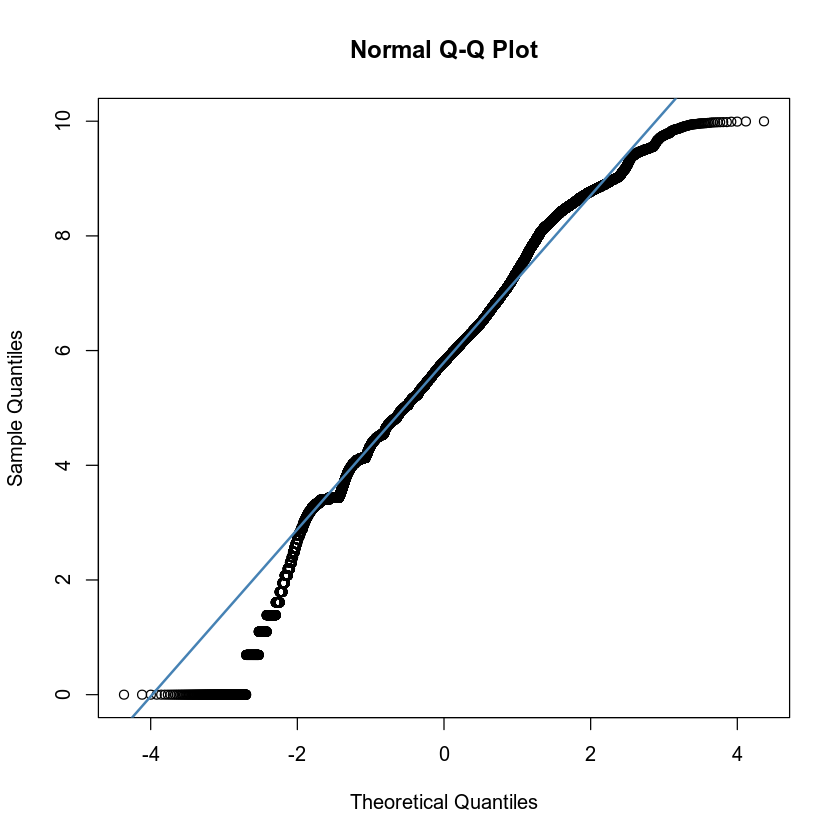

In [49]:
y <- log(op$arr_flights)
summary(y)
qqnorm(y); qqline(y,col = "steelblue", lwd = 2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09531 4.07923 4.78833 4.84713 5.60984 9.99776 

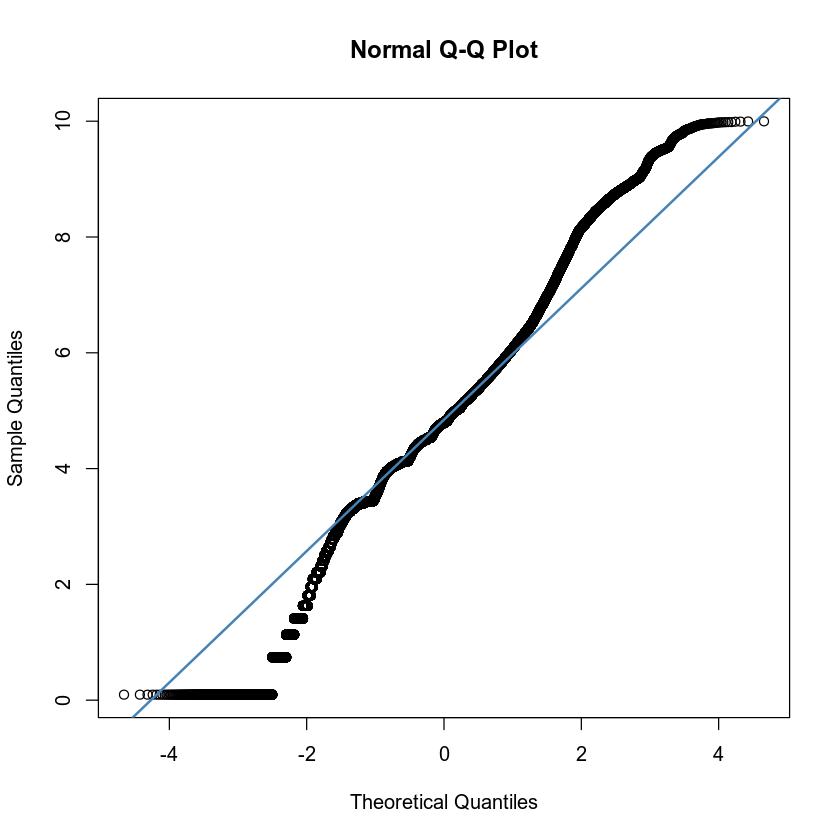

In [51]:
# We choose a log-transformation for the arr_flights count:
data["larr_flights"] <- log(.1+data$arr_flights)
y <- data$larr_flights
summary(y)
qqnorm(y); qqline(y,col = "steelblue", lwd = 2)

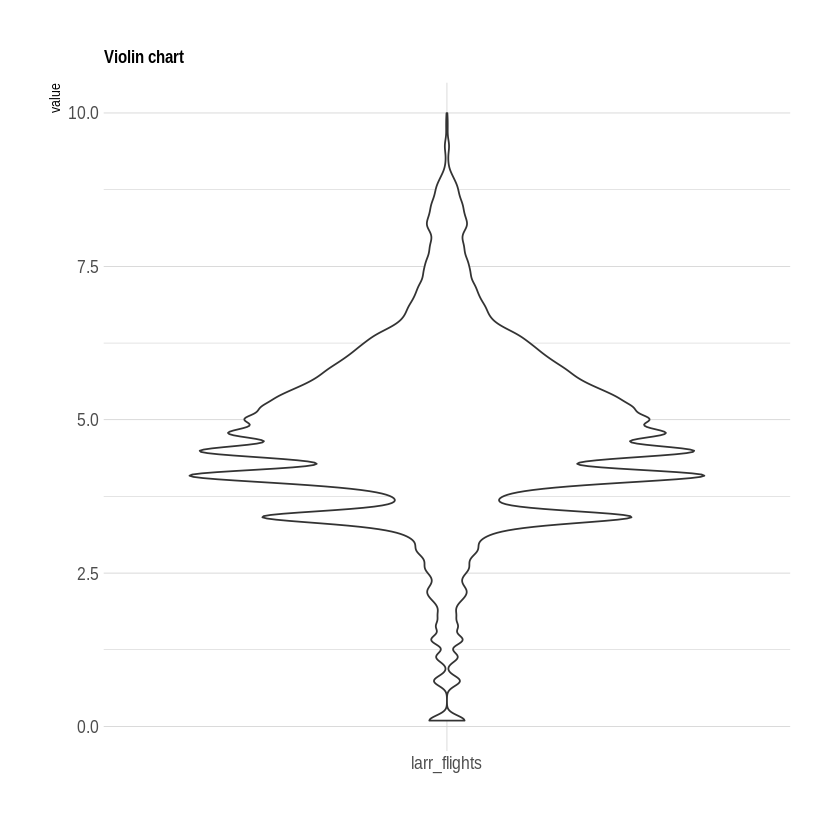

In [65]:
ggplot(data.frame(name=c("larr_flights"), value=c(data$larr_flights)), aes(x=name,y=value)) + geom_violin() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Violin chart") +
    xlab("")

In [71]:
jarque.bera.test(data$larr_flights)


	Jarque Bera Test

data:  data$larr_flights
X-squared = 20638, df = 2, p-value < 2.2e-16


In [72]:
shapiro.test(sample(data$larr_flights, size=1000, replace=F))


	Shapiro-Wilk normality test

data:  sample(data$larr_flights, size = 1000, replace = F)
W = 0.977, p-value = 1.757e-11


In [ ]:
# I admit: this is not normal distributed at all

In [85]:
weekm <- lm(larr_flights~mon_ct+tue_ct+wed_ct+thu_ct+fri_ct+sat_ct+sun_ct+t+as.factor(carrier)+as.factor(airport),data=data)

In [86]:
summary(weekm)


Call:
lm(formula = larr_flights ~ mon_ct + tue_ct + wed_ct + thu_ct + 
    fri_ct + sat_ct + sun_ct + t + as.factor(carrier) + as.factor(airport), 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6588 -0.5507  0.0906  0.6406  3.9510 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2.863e+00  8.068e-02  35.491  < 2e-16 ***
mon_ct                 5.499e-02  5.915e-03   9.297  < 2e-16 ***
tue_ct                 3.315e-02  5.845e-03   5.671 1.42e-08 ***
wed_ct                 3.434e-02  5.959e-03   5.763 8.26e-09 ***
thu_ct                 5.491e-02  5.864e-03   9.364  < 2e-16 ***
fri_ct                 3.014e-02  5.906e-03   5.103 3.35e-07 ***
sat_ct                 3.381e-02  5.812e-03   5.818 5.97e-09 ***
sun_ct                 3.302e-02  5.857e-03   5.637 1.73e-08 ***
t                     -1.638e-03  3.387e-05 -48.361  < 2e-16 ***
as.factor(carrier)AA   6.173e-01  1.310e-02  47.132  < 2e-16 ***
as.factor(

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-6.65877 -0.55069  0.09062  0.00000  0.64063  3.95099 

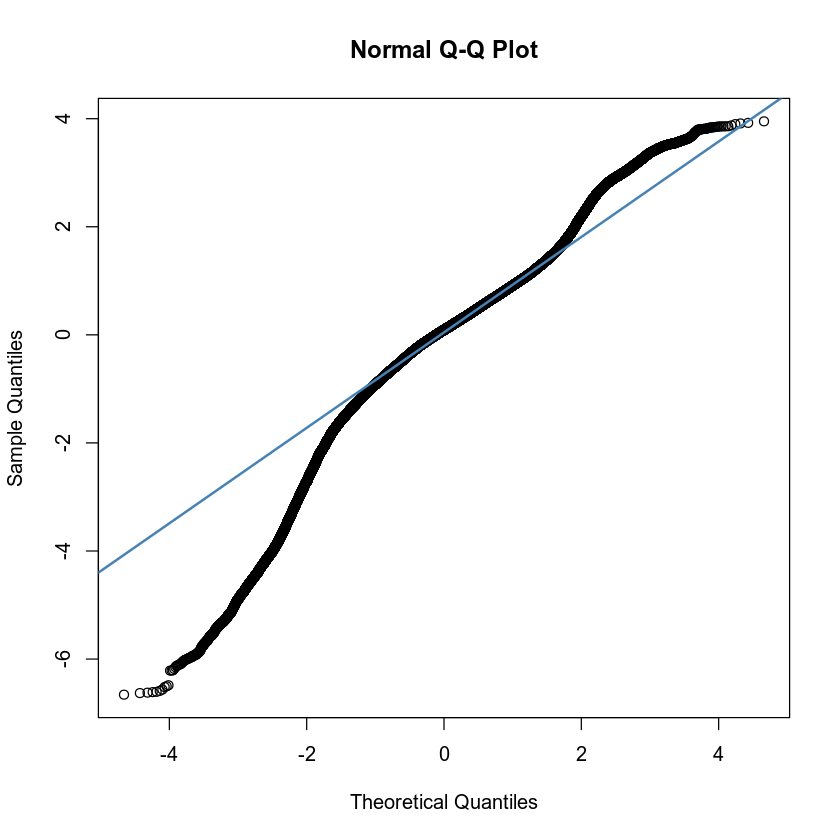

In [89]:
y <- weekm$residuals
summary(y)
qqnorm(y); qqline(y,col = "steelblue", lwd = 2)


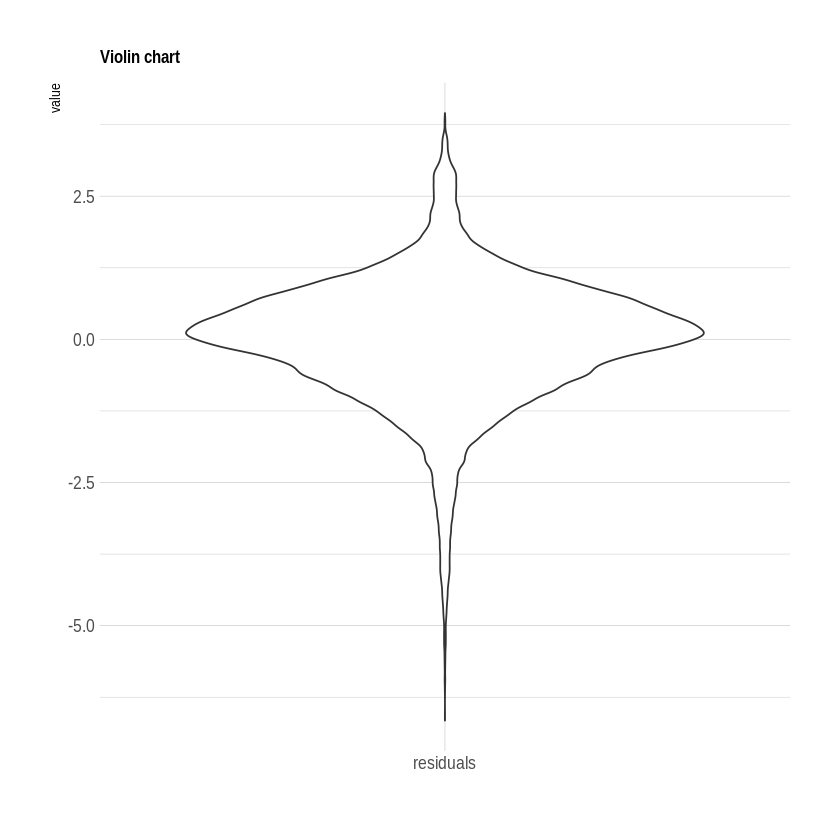

In [103]:

ggplot(data.frame(name=c("residuals"), value=c(y)), aes(x=name,y=value)) + geom_violin() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Violin chart") +
    xlab("")

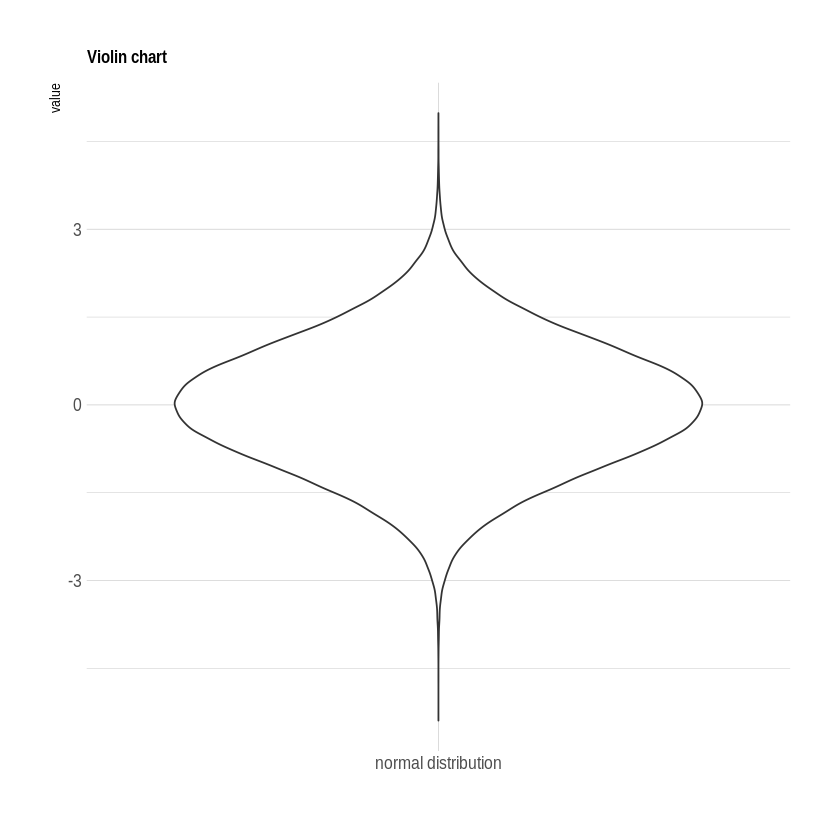

In [105]:
ggplot(data.frame(name=c("normal distribution"), value=c(rnorm(length(y),mean(y),sd(y)))), aes(x=name,y=value)) + geom_violin() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Violin chart") +
    xlab("")

In [106]:
jarque.bera.test(y)


	Jarque Bera Test

data:  y
X-squared = 112659, df = 2, p-value < 2.2e-16


In [107]:
weekp <- glm(arr_flights ~ mon_ct+tue_ct+wed_ct+thu_ct+fri_ct+sat_ct+sun_ct+t+as.factor(carrier)+as.factor(airport), family=poisson(), data=data)
summary(weekp)


Call:
glm(formula = arr_flights ~ mon_ct + tue_ct + wed_ct + thu_ct + 
    fri_ct + sat_ct + sun_ct + t + as.factor(carrier) + as.factor(airport), 
    family = poisson(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-115.017   -11.177    -3.069     3.487   227.289  

Coefficients:
                        Estimate Std. Error  z value Pr(>|z|)    
(Intercept)            2.788e+00  5.117e-03  544.809  < 2e-16 ***
mon_ct                 4.738e-02  2.766e-04  171.297  < 2e-16 ***
tue_ct                 4.457e-02  2.731e-04  163.177  < 2e-16 ***
wed_ct                 3.859e-02  2.786e-04  138.498  < 2e-16 ***
thu_ct                 4.662e-02  2.741e-04  170.063  < 2e-16 ***
fri_ct                 4.305e-02  2.775e-04  155.155  < 2e-16 ***
sat_ct                 3.399e-02  2.724e-04  124.763  < 2e-16 ***
sun_ct                 4.254e-02  2.747e-04  154.832  < 2e-16 ***
t                     -4.797e-04  1.539e-06 -311.760  < 2e-16 ***
as.factor(carri

Warning message:
“not plotting observations with leverage one:
  84196, 86490, 249421, 250048, 261967, 298749, 303129”


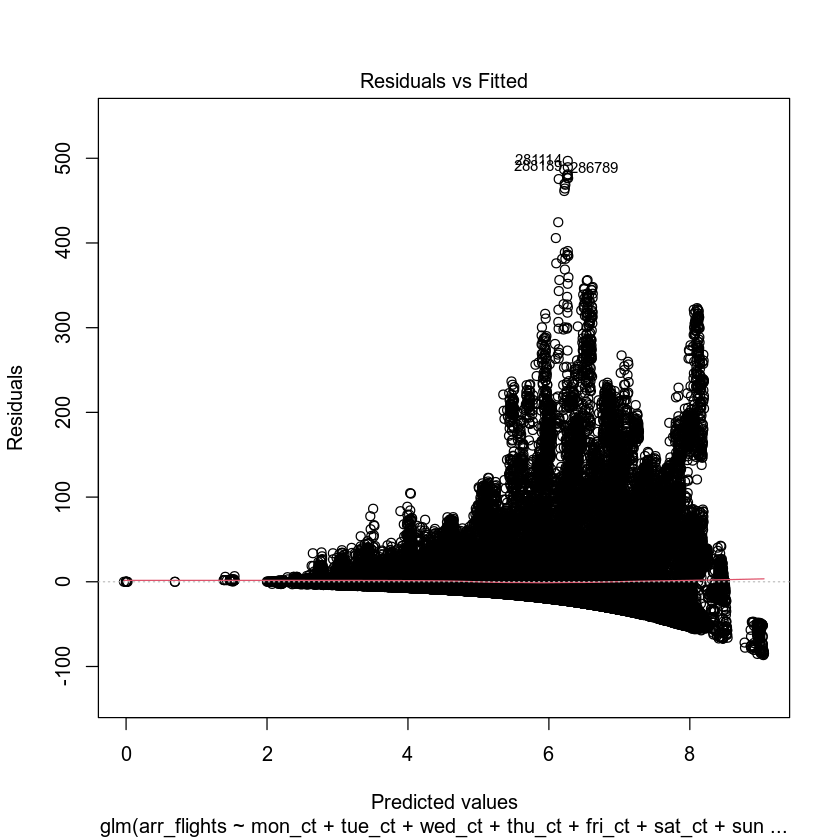

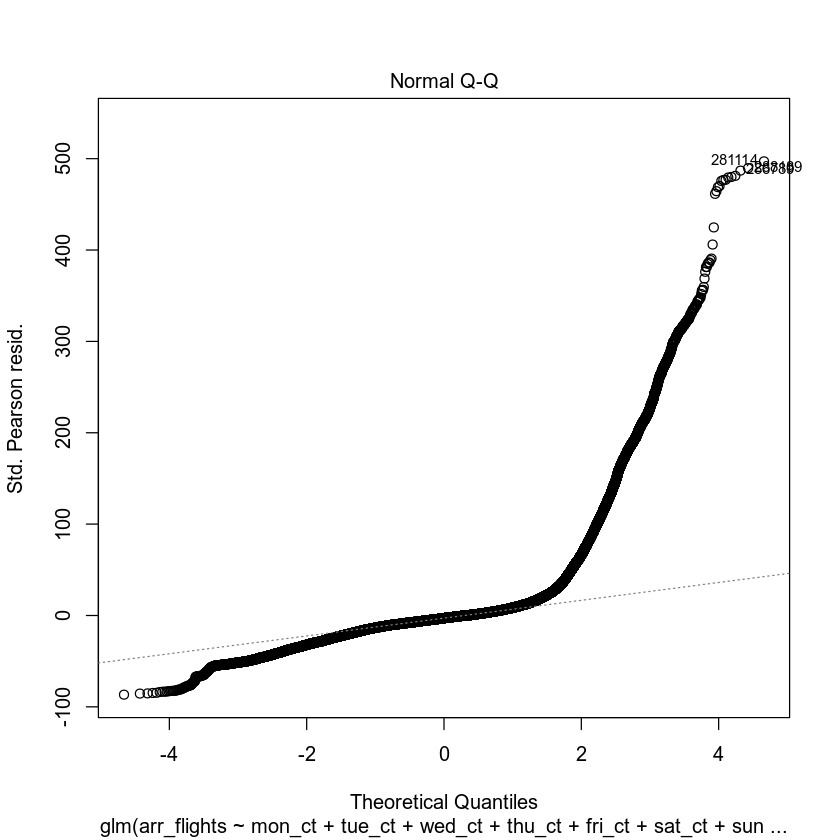

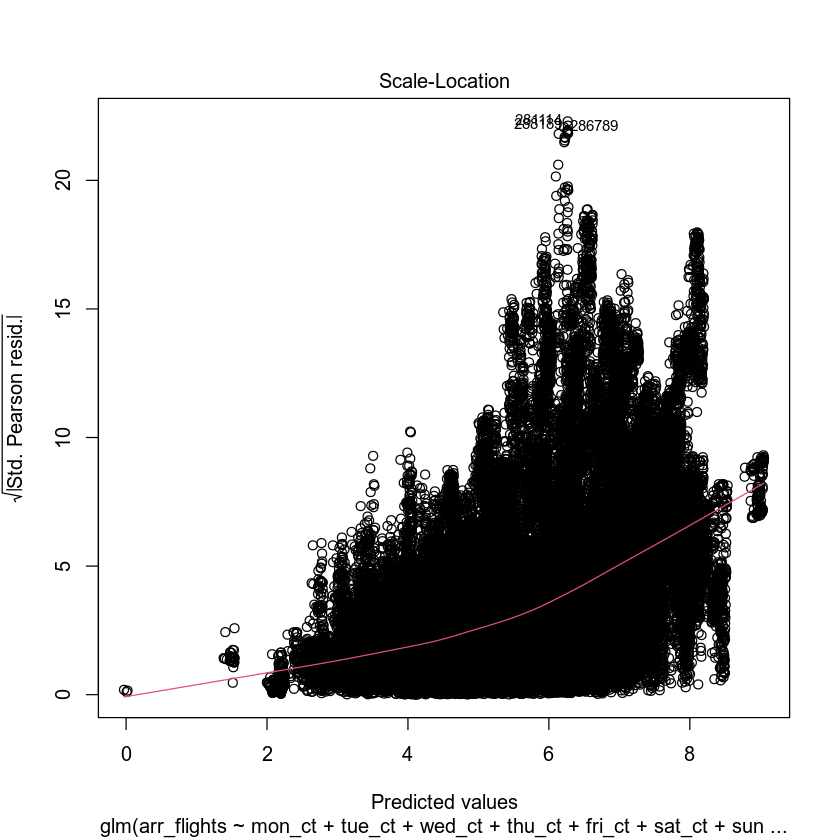

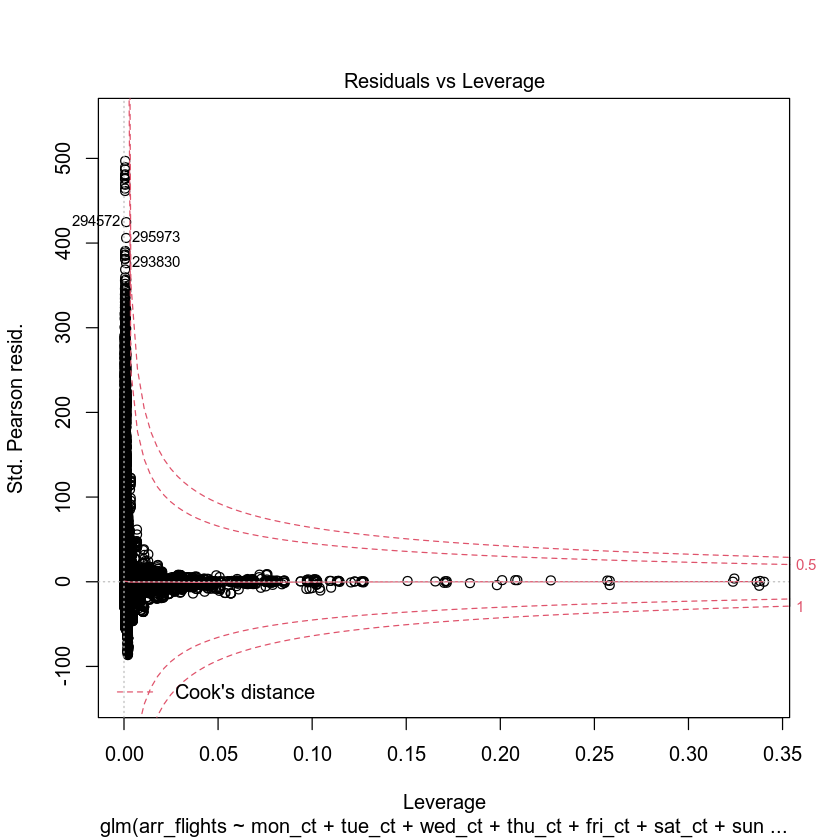

In [108]:
plot(weekp)

In [110]:
weeknb <- MASS::glm.nb(arr_flights ~ mon_ct+tue_ct+wed_ct+thu_ct+fri_ct+sat_ct+sun_ct+t+as.factor(carrier)+as.factor(airport), data=data)
summary(weeknb)


Call:
MASS::glm.nb(formula = arr_flights ~ mon_ct + tue_ct + wed_ct + 
    thu_ct + fri_ct + sat_ct + sun_ct + t + as.factor(carrier) + 
    as.factor(airport), data = data, init.theta = 1.176331833, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8591  -0.9763  -0.2779   0.3028   5.5619  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            3.0527868  0.0682127  44.754  < 2e-16 ***
mon_ct                 0.0482479  0.0049964   9.657  < 2e-16 ***
tue_ct                 0.0462132  0.0049375   9.360  < 2e-16 ***
wed_ct                 0.0361000  0.0050334   7.172 7.39e-13 ***
thu_ct                 0.0461071  0.0049527   9.310  < 2e-16 ***
fri_ct                 0.0429956  0.0049893   8.618  < 2e-16 ***
sat_ct                 0.0369646  0.0049096   7.529 5.11e-14 ***
sun_ct                 0.0382035  0.0049474   7.722 1.15e-14 ***
t                     -0.0010841  0.0000286 -37.903  < 2e-16 ***
as.

Warning message:
“not plotting observations with leverage one:
  84196, 86490, 249421, 250048, 261967, 298749, 303129”


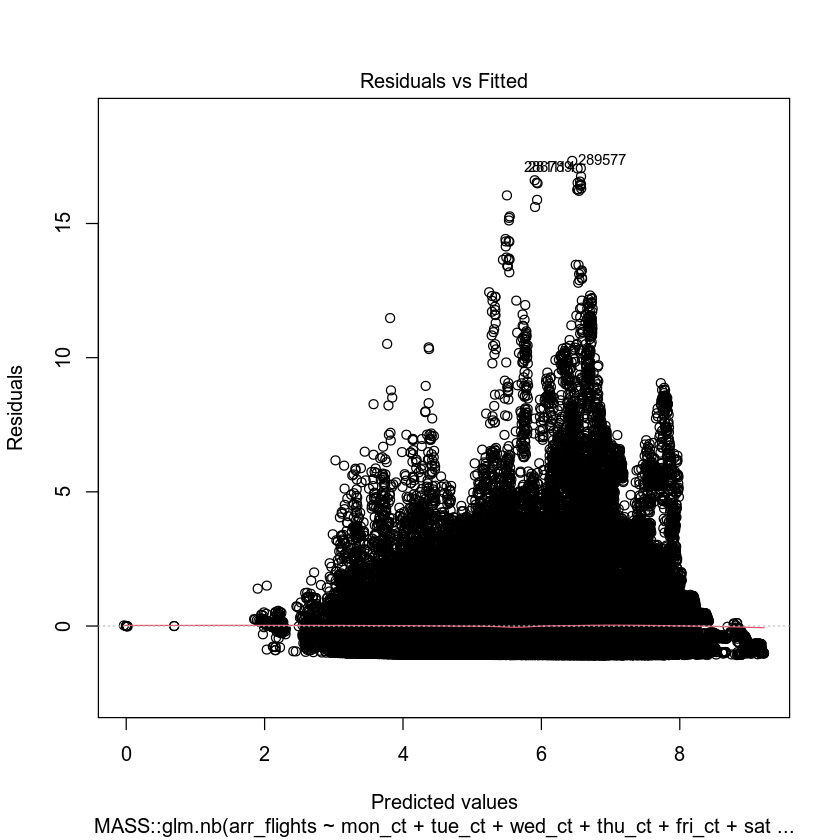

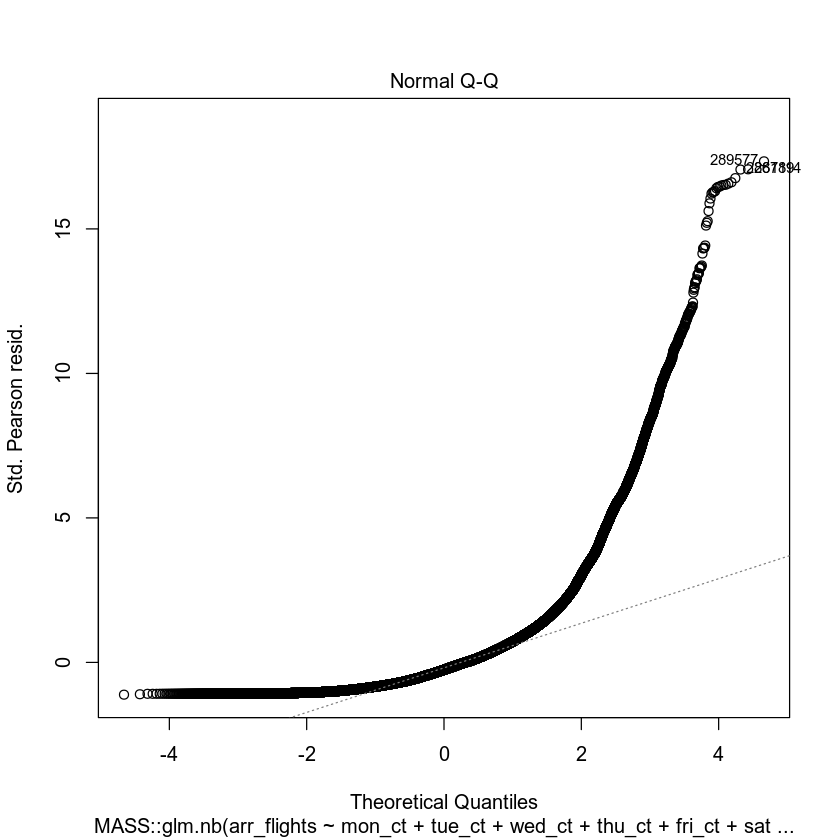

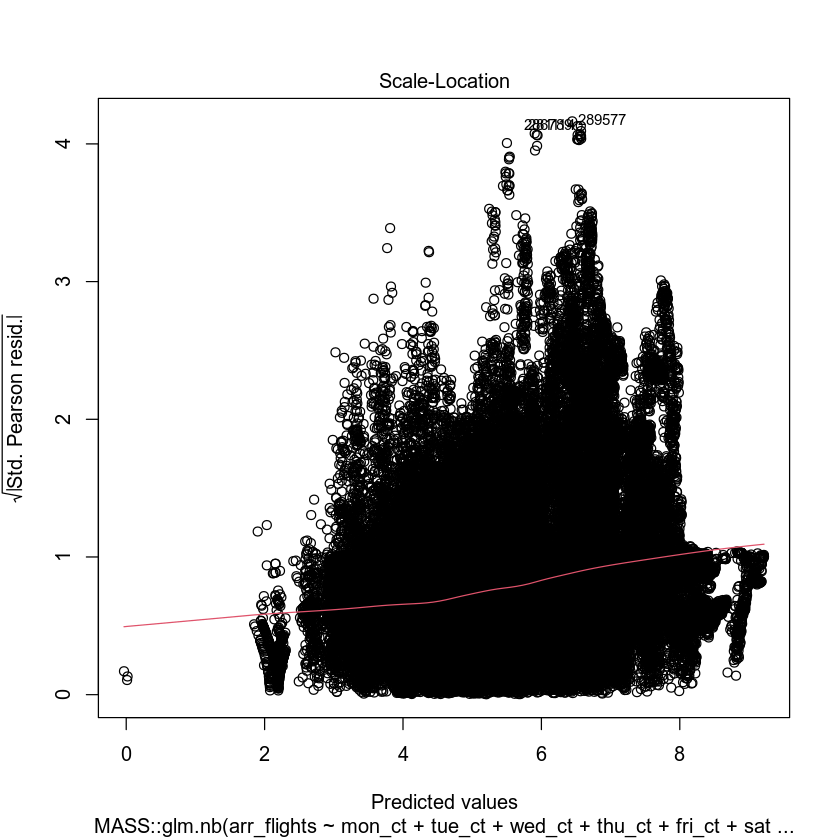

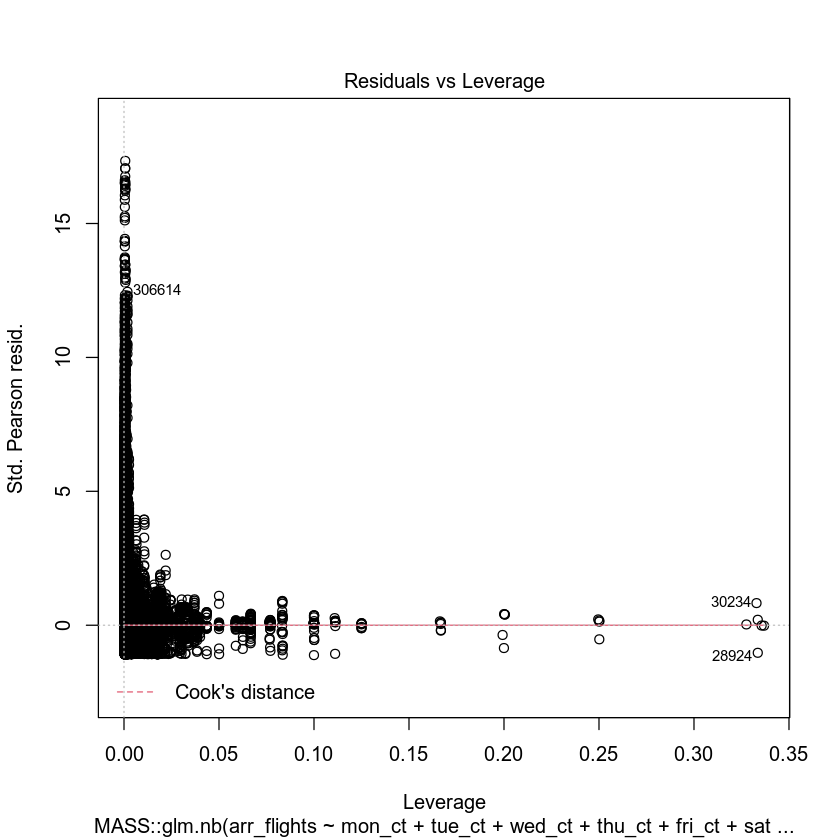

In [111]:
plot(weeknb)

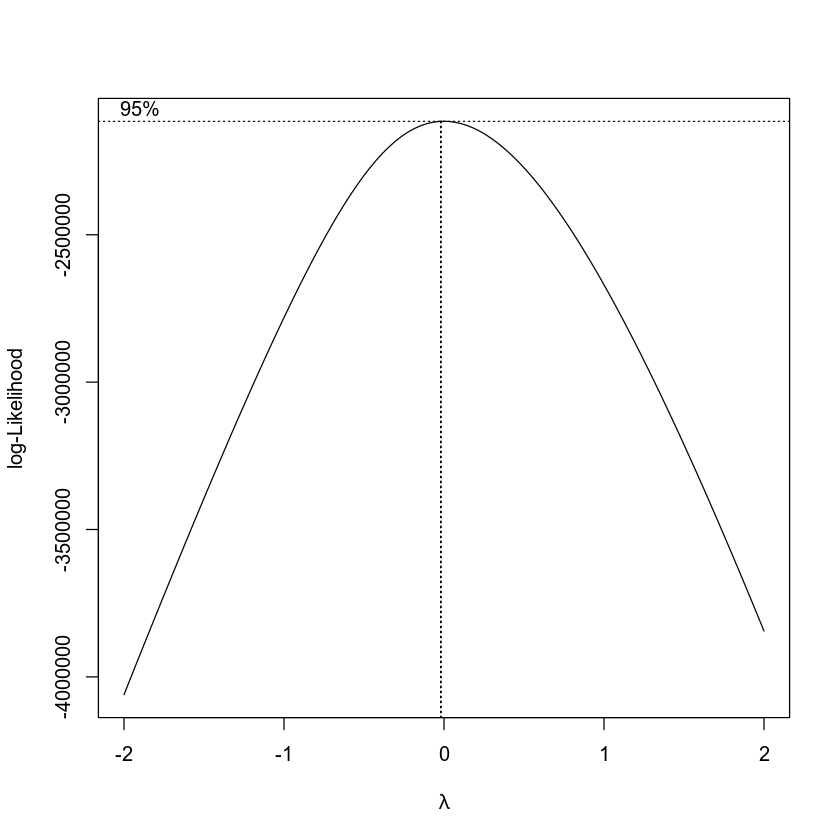

In [122]:
boxcox_m <- MASS::boxcox(lm(arr_flights ~ 1,data=data),data=data)

In [124]:
lambda <- boxcox_m$x[which.max(boxcox_m$y)]
lambda

[1] -0.02020202

In [125]:
data["bcarr_flights"] = (data$arr_flights ^ lambda - 1)/ lambda

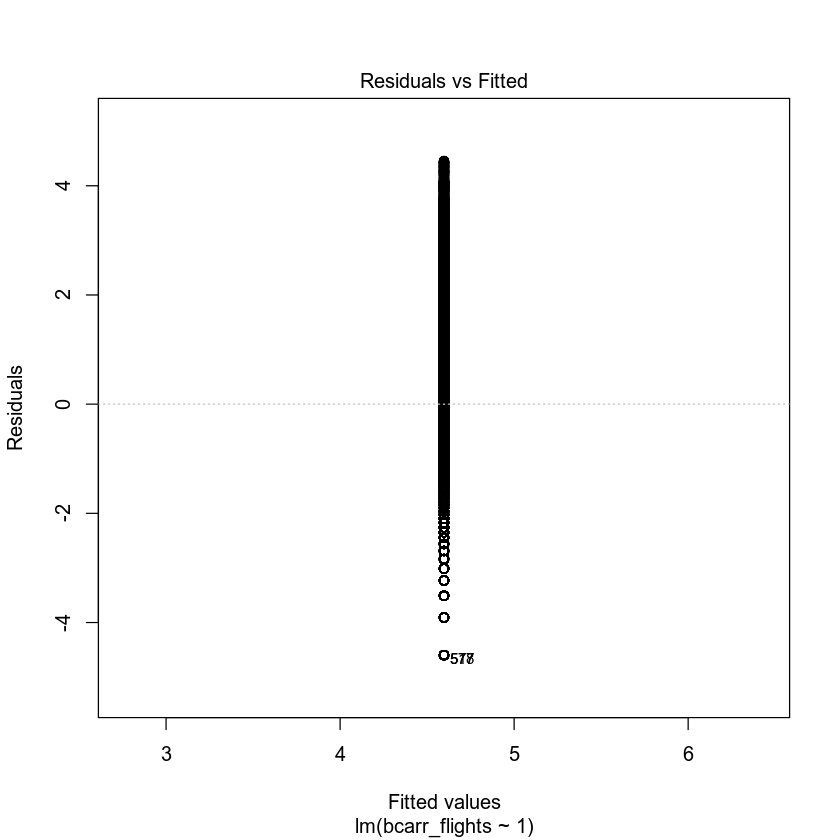

hat values (leverages) are all = 3.154783e-06
 and there are no factor predictors; no plot no. 5



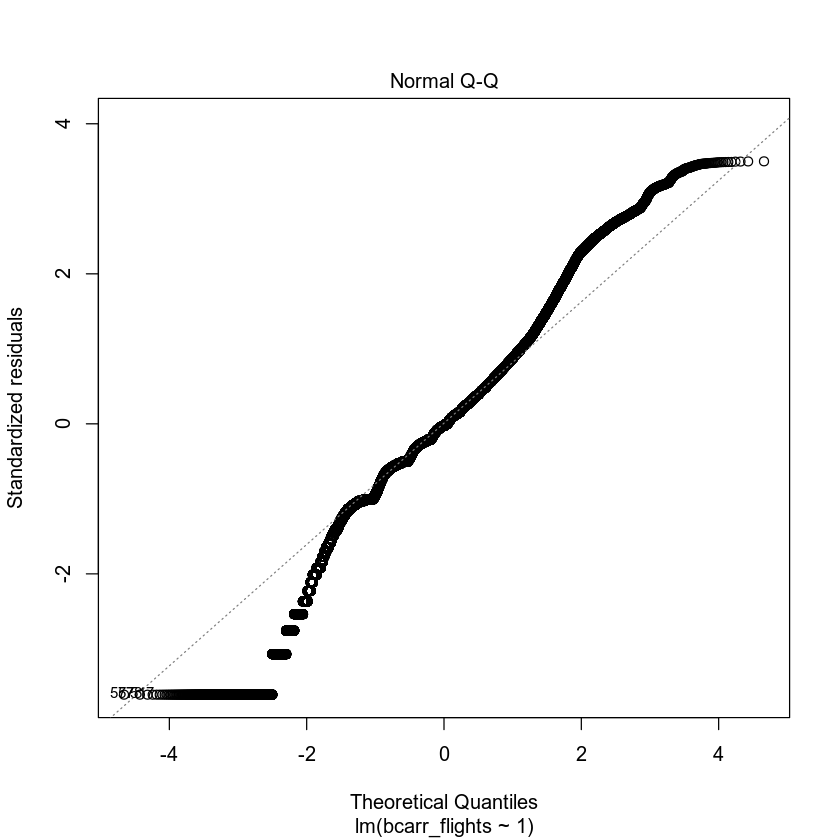

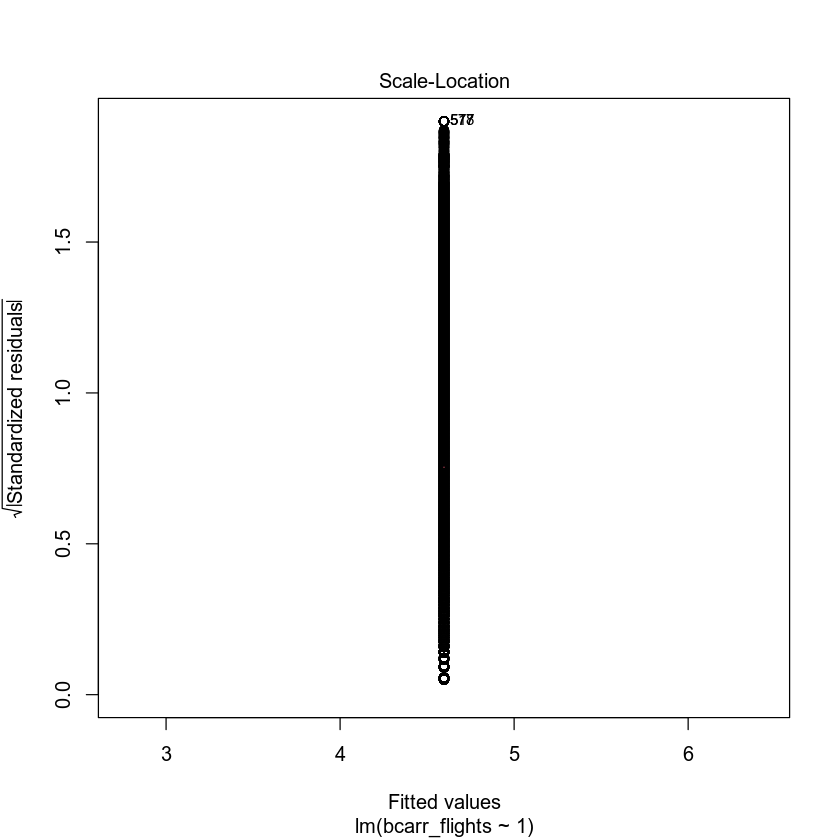

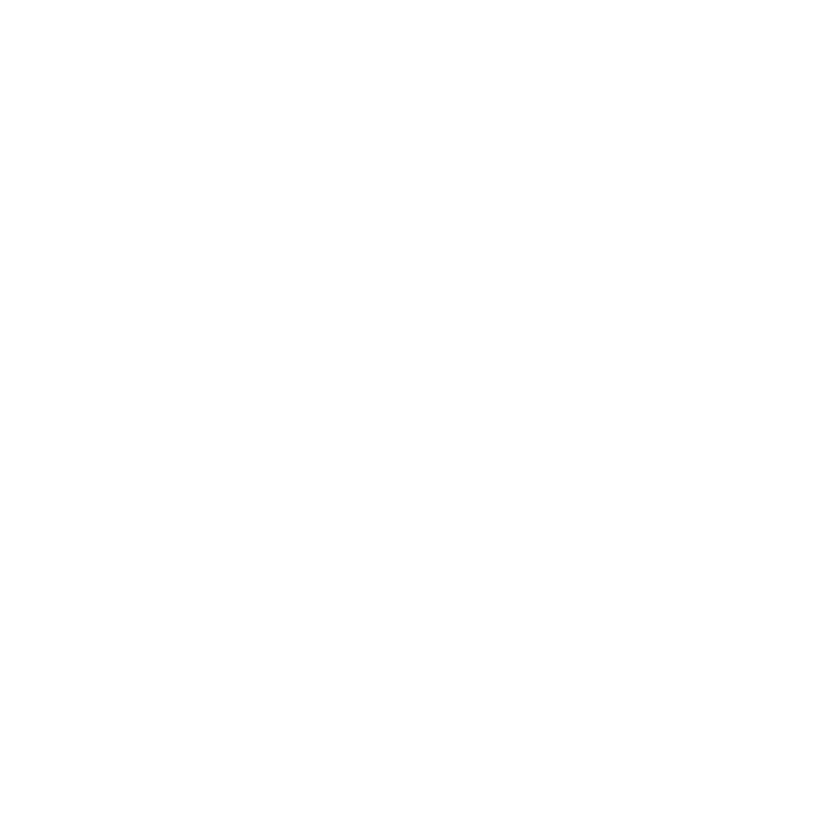

In [126]:
plot(lm(bcarr_flights ~1, data=data))

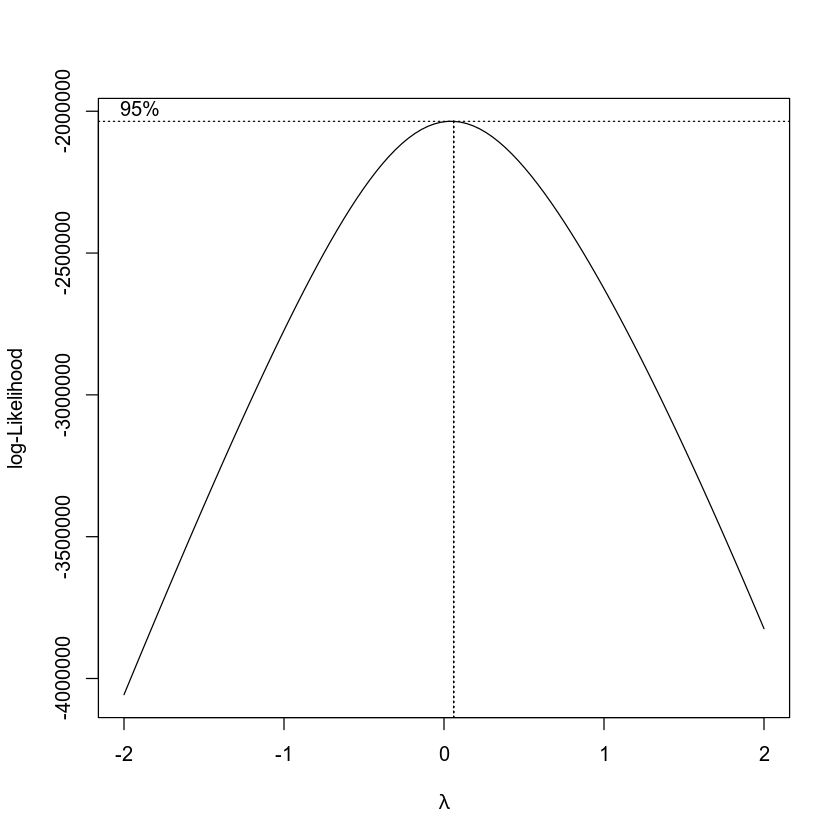

In [128]:
boxcox_m <- MASS::boxcox(lm(arr_flights ~ mon_ct+tue_ct+wed_ct+thu_ct+fri_ct+sat_ct+sun_ct+t+as.factor(carrier)+as.factor(airport)+as.factor(year),data=data))

In [129]:
lambda <- boxcox_m$x[which.max(boxcox_m$y)]
lambda

[1] 0.06060606

In [130]:
# boxcox: arr_flights should be log transformed

In [137]:
sum(data$arr_flights == 0)

[1] 0

In [138]:
data$larr_flights = log(data$arr_flights)

In [140]:
model <- lm(larr_flights ~ mon_ct+tue_ct+wed_ct+thu_ct+fri_ct+sat_ct+sun_ct+t+as.factor(carrier)+as.factor(airport)+as.factor(year),data=data)


Call:
lm(formula = larr_flights ~ mon_ct + tue_ct + wed_ct + thu_ct + 
    fri_ct + sat_ct + sun_ct + t + as.factor(carrier) + as.factor(airport) + 
    as.factor(year), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7551 -0.5462  0.0903  0.6397  4.0930 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2.8629443  0.0836879  34.210  < 2e-16 ***
mon_ct                 0.0561512  0.0060053   9.350  < 2e-16 ***
tue_ct                 0.0276330  0.0059018   4.682 2.84e-06 ***
wed_ct                 0.0435669  0.0060402   7.213 5.49e-13 ***
thu_ct                 0.0594370  0.0059323  10.019  < 2e-16 ***
fri_ct                 0.0280675  0.0060306   4.654 3.25e-06 ***
sat_ct                 0.0351856  0.0058794   5.985 2.17e-09 ***
sun_ct                 0.0358511  0.0059192   6.057 1.39e-09 ***
t                     -0.0016497  0.0005927  -2.783 0.005382 ** 
as.factor(carrier)AA   0.5841025  0.0132941  43.937  < 2e

Warning message:
“not plotting observations with leverage one:
  84196, 86490, 249421, 250048, 261967, 298749, 303129”


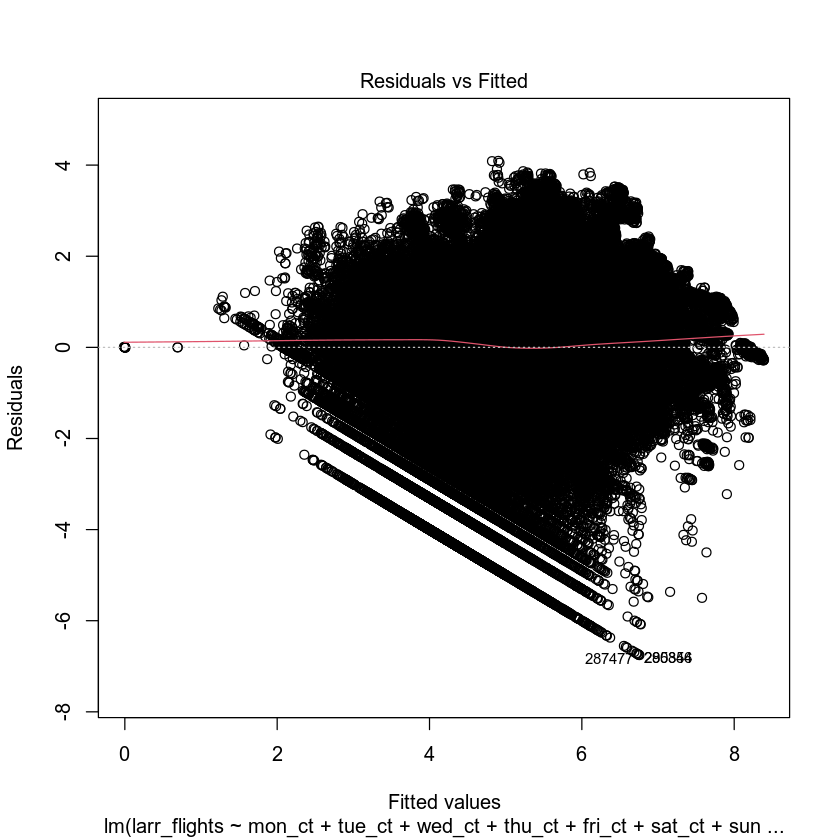

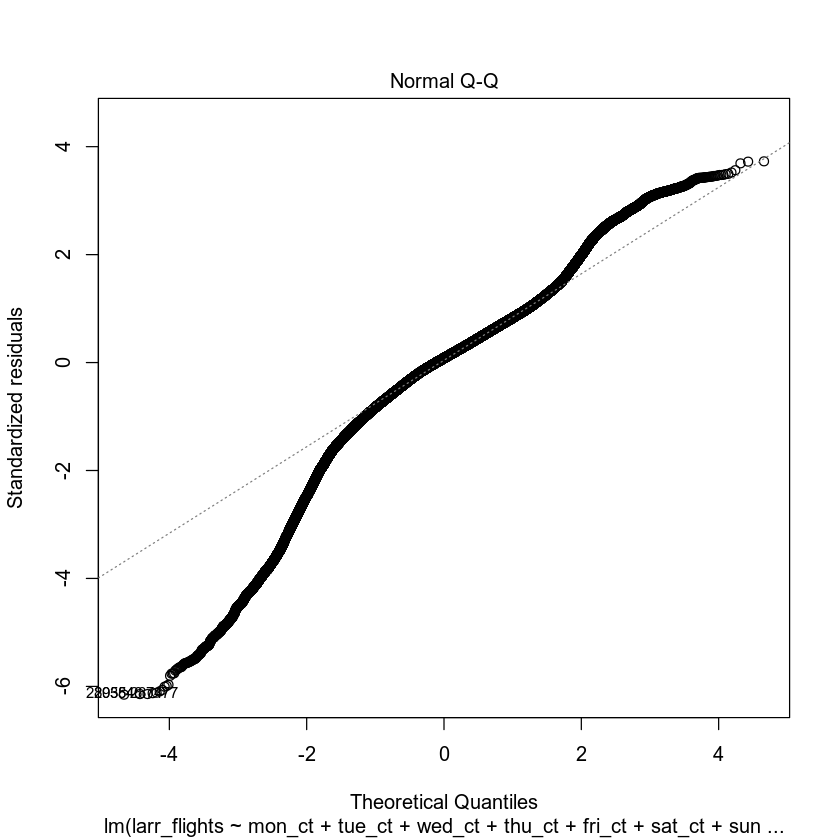

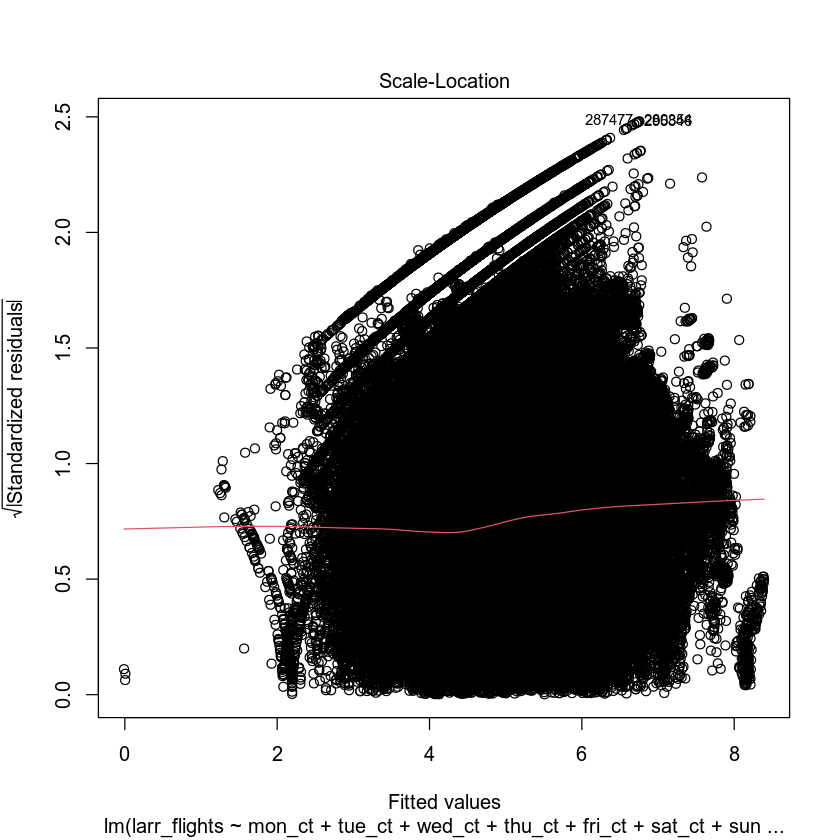

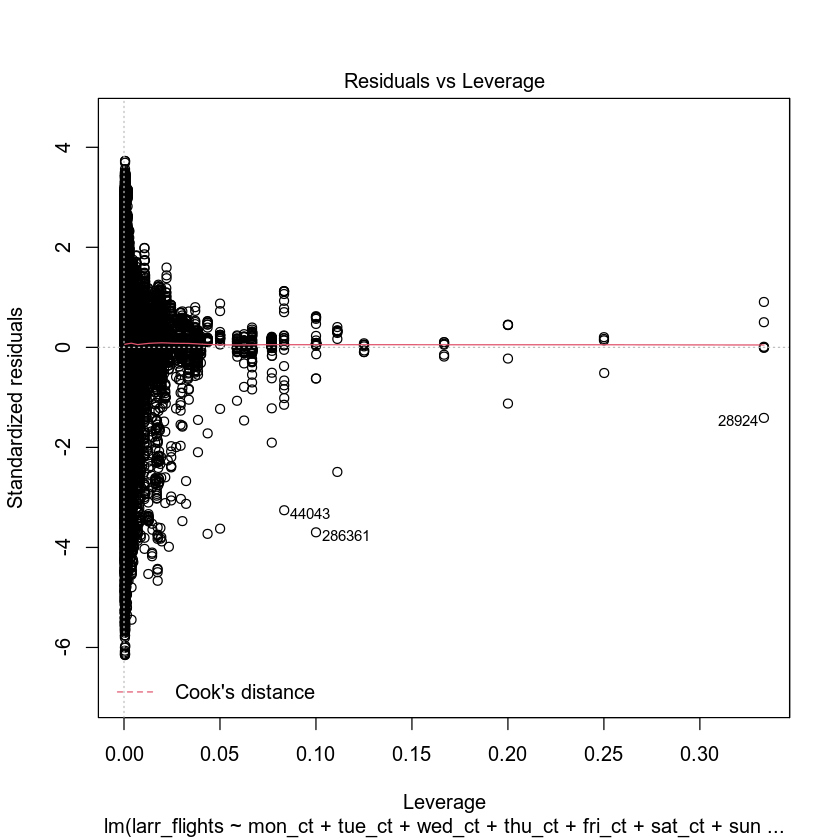

In [141]:
summary(model)
plot(model)

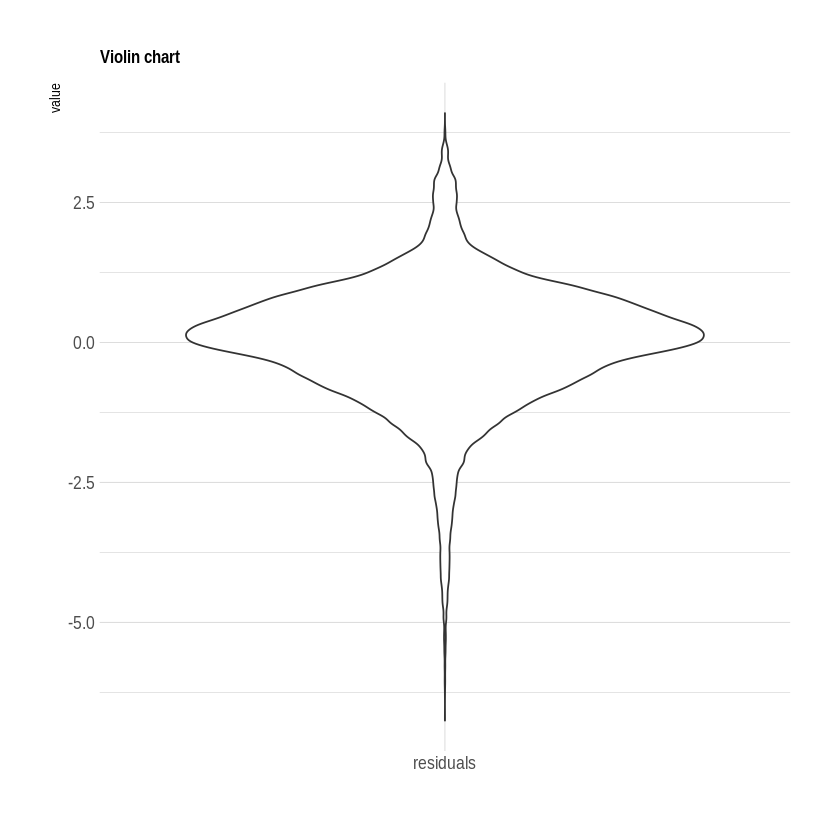

In [142]:
y <- model$residuals

ggplot(data.frame(name=c("residuals"), value=c(y)), aes(x=name,y=value)) + geom_violin() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Violin chart") +
    xlab("")

In [143]:
summary(model$residuals)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-6.75509 -0.54623  0.09035  0.00000  0.63975  4.09299 

In [163]:
shapiroValues <- lapply(seq_len(1000),function(x) shapiro.test(sample(model$residuals,30))$p.value)

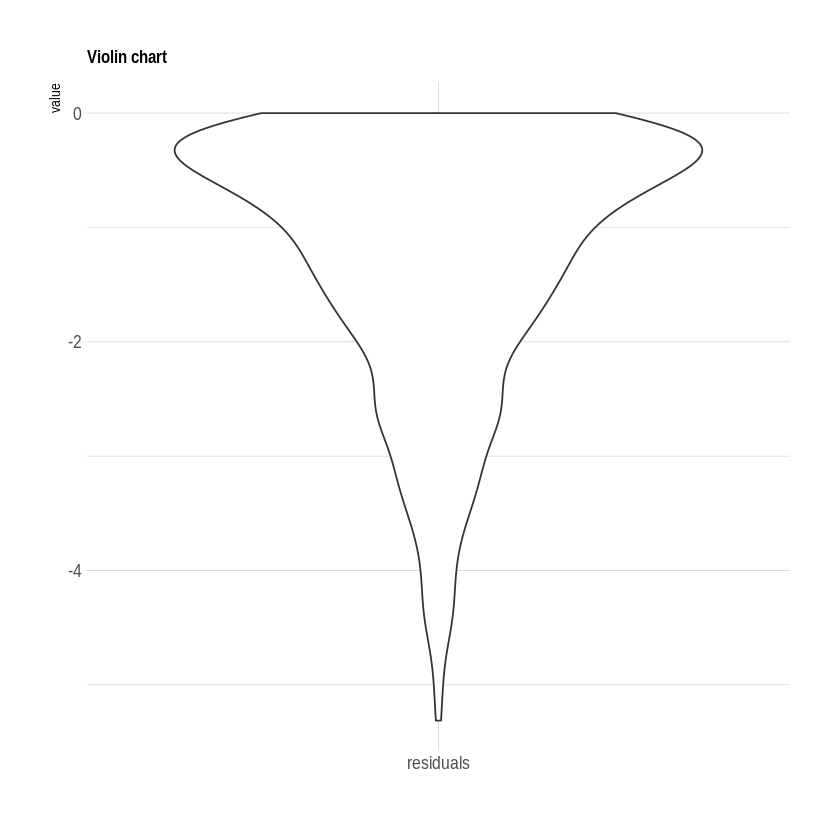

In [170]:
y <- log10(unlist(shapiroValues))
ggplot(data.frame(name=c("residuals"), value=c(y)), aes(x=name,y=value)) + geom_violin() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Violin chart") +
    xlab("")

In [177]:
sum(unlist(shapiroValues)<0.02)/1000

[1] 0.281

In [ ]:
# These factors may be too hard to interpret